In [8]:
import torch
import torchvision
import torchvision.transforms as transforms

# Set device to use CUDA if available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [424]:
path = 'C:/Users/tibor/PycharmProjects/nsiete/nsiete/project2/data/animals/raw-img'
path1 = 'D:/Users/Desktop/animals/raw-img'

Printing all unique image sizes.

In [438]:
import os
from PIL import Image


image_sizes = set()
for folder in os.listdir(path1):
    folder_path = os.path.join(path1, folder)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            with Image.open(file_path) as img:
                image_sizes.add(img.size)

print(image_sizes)

{(449, 640), (640, 320), (300, 270), (640, 329), (300, 279), (181, 300), (640, 576), (278, 251), (640, 347), (187, 240), (300, 108), (290, 225), (640, 356), (282, 221), (300, 117), (300, 126), (300, 135), (249, 300), (238, 300), (300, 144), (391, 640), (286, 218), (276, 183), (296, 250), (640, 450), (160, 240), (243, 256), (640, 459), (468, 640), (4074, 2716), (2848, 4272), (640, 468), (150, 223), (236, 226), (300, 229), (640, 477), (231, 269), (300, 238), (200, 300), (211, 300), (615, 640), (222, 300), (300, 247), (593, 640), (5184, 3456), (258, 241), (300, 256), (220, 147), (640, 315), (300, 265), (272, 194), (219, 160), (279, 300), (640, 571), (640, 342), (173, 300), (200, 165), (300, 112), (216, 289), (300, 121), (4256, 2832), (280, 292), (300, 130), (6720, 4480), (640, 436), (241, 300), (230, 300), (634, 640), (153, 187), (640, 445), (220, 277), (225, 203), (528, 640), (640, 454), (264, 194), (640, 463), (300, 224), (640, 472), (246, 253), (280, 166), (300, 233), (211, 295), (300,

Finding the top 40 images with biggest image size.

In [449]:
num_list = list(image_sizes)
num_list.sort(reverse=True)

i = 1
for num in num_list[:40]:
    print(i, num)
    i+=1

1 (6720, 4480)
2 (6016, 4000)
3 (6000, 4000)
4 (5554, 3703)
5 (5518, 3679)
6 (5472, 3648)
7 (5403, 3602)
8 (5184, 3456)
9 (4928, 3264)
10 (4896, 3264)
11 (4608, 3072)
12 (4512, 3000)
13 (4288, 2287)
14 (4272, 2848)
15 (4256, 2832)
16 (4147, 2765)
17 (4074, 2716)
18 (4000, 2667)
19 (3861, 2574)
20 (3840, 2160)
21 (3798, 6000)
22 (3577, 5365)
23 (3560, 2582)
24 (3456, 4608)
25 (3264, 2448)
26 (3256, 4884)
27 (3106, 2071)
28 (2848, 4272)
29 (2482, 1655)
30 (640, 640)
31 (640, 634)
32 (640, 630)
33 (640, 623)
34 (640, 618)
35 (640, 616)
36 (640, 609)
37 (640, 602)
38 (640, 601)
39 (640, 599)
40 (640, 597)


In [457]:
import statistics

column_1 = [x[0] for x in image_sizes]
mode_1 = statistics.mode(column_1)
print("Mode of column 1:", mode_1)

column_2 = [x[1] for x in image_sizes]
mode_2 = statistics.mode(column_2)
print("Mode of column 2:", mode_2)

Mode of column 1: 640
Mode of column 2: 300


Number of images in every folder.

In [435]:
from prettytable import PrettyTable

def printTable():
    def count_files(path):
        num_files = 0
        for root, dirs, files in os.walk(path):
            for file in files:
                num_files += 1
        return num_files

    directories = [dir for dir in os.listdir(path)
                   if os.path.isdir(os.path.join(path, dir))]

    table = PrettyTable()
    table.field_names = ["folder", "img count"]

    for dir in directories:
        dir_path = os.path.join(path, dir)
        file_count = count_files(dir_path)
        table.add_row([dir, file_count])

    table.sortby = "img count"

    print(table)

In [436]:
printTable()

+-----------+-----------+
|   folder  | img count |
+-----------+-----------+
|  elephant |    1446   |
|    cat    |    1668   |
|   sheep   |    1820   |
|  squirrel |    1862   |
|    cow    |    1866   |
| butterfly |    2112   |
|   horse   |    2623   |
|  chicken  |    3098   |
|   spider  |    4821   |
|    dog    |    4863   |
+-----------+-----------+


We have 1446 elephant images, which is the fewest in the dataset.
We want to have 2000 images in every folder.

In [437]:
# Set the target number of images
target_num_images = 2000

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomCrop(size=224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=30),
    transforms.ToTensor(),
])

import os
from PIL import Image
from torchvision import transforms
from torchvision.transforms import functional as F
import random

# Loop through each folder in the dataset and apply data augmentation
for folder_name in os.listdir(path):
    folder_path = os.path.join(path, folder_name)
    num_images = len(os.listdir(folder_path))
    num_augmented_images = target_num_images - num_images
    if num_augmented_images <= 0:
        continue
    for i in range(num_augmented_images):
        # Load an image from the folder
        image_path = os.path.join(folder_path, os.listdir(folder_path)[i % num_images])
        image = Image.open(image_path)
        image = image.convert('RGB')

        # Apply data augmentation to the image
        augmented_image = transform(image)

        # Save the augmented image to the folder
        new_image_path = os.path.join(folder_path, f"xaugmented_{i}.png")
        augmented_image = augmented_image.permute(1, 2, 0).numpy()
        Image.fromarray((augmented_image * 255).astype('uint8')).save(new_image_path)

In [417]:
printTable()

+-----------+-----------+
|   folder  | img count |
+-----------+-----------+
|    cat    |    2000   |
|    cow    |    2000   |
|  elephant |    2000   |
|   sheep   |    2000   |
|  squirrel |    2000   |
| butterfly |    2112   |
|   horse   |    2623   |
|  chicken  |    3098   |
|   spider  |    4821   |
|    dog    |    4863   |
+-----------+-----------+


Now we randomly remove images from the dataset so that we have exactly 2000 images in each folder.

In [459]:
for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)

    if os.path.isdir(folder_path):
        files = os.listdir(folder_path)

        if len(files) > target_num_images:
            keep_files = random.sample(files, target_num_images)

            for file in files:
                file_path = os.path.join(folder_path, file)

                if file not in keep_files:
                    os.remove(file_path)

In [460]:
printTable()

+-----------+-----------+
|   folder  | img count |
+-----------+-----------+
| butterfly |    2000   |
|    cat    |    2000   |
|  chicken  |    2000   |
|    cow    |    2000   |
|    dog    |    2000   |
|  elephant |    2000   |
|   horse   |    2000   |
|   sheep   |    2000   |
|   spider  |    2000   |
|  squirrel |    2000   |
+-----------+-----------+


In [461]:
import os
import collections

def print_formats():
    formats = collections.defaultdict(int)

    for root, dirs, files in os.walk(path):
        for file in files:
            file_format = file.split('.')[-1]
            formats[file_format] += 1

    print(formats)

In [462]:
print_formats()

defaultdict(<class 'int'>, {'jpg': 1705, 'png': 1385, 'jpeg': 16910})


In [469]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets

data_dir = "path/to/dataset"
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
dataset = datasets.ImageFolder(root=path, transform=transform)

In [470]:
data_loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=False, num_workers=4)

In [471]:
mean = 0.
std = 0.
total_images = 0
for images, _ in data_loader:
    batch_samples = images.size(0)
    images = images.view(batch_samples, images.size(1), -1)
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)
    total_images += batch_samples

mean /= total_images
std /= total_images

print("Mean: ", mean)
print("Std: ", std)

Mean:  tensor([0.5081, 0.4923, 0.4061])
Std:  tensor([0.2185, 0.2171, 0.2197])


In [474]:
# Define transform to apply to each image in the dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),   # Resize each image to 224x224 pixels
    transforms.ToTensor(),           # Convert each image to a PyTorch tensor
    transforms.Normalize(mean=[0.5081, 0.4923, 0.4061], std=[0.2185, 0.2171, 0.2197])
])

In [475]:
dataset = torchvision.datasets.ImageFolder(root=path, transform=transform)

In [476]:
# Split the dataset into training and testing sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

mini_data_size = len(dataset) * 0.2
mini_train_size = int(0.8 * mini_data_size)
mini_test_size = len(dataset) - mini_train_size

mini_train_dataset, mini_test_dataset = torch.utils.data.random_split(dataset, [mini_train_size, mini_test_size])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


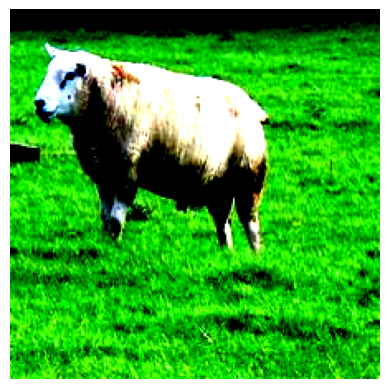

In [494]:
import matplotlib.pyplot as plt

img, label = mini_train_dataset[47]
# Transpose the tensor to match the expected format for imshow
img = img.permute(1, 2, 0)

# Show the image using matplotlib
plt.imshow(img)
plt.axis('off')
plt.show()

# End of data analysis

In [30]:

batch_size = 16
trainloader = torch.utils.data.DataLoader(mini_train_dataset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(mini_test_dataset, batch_size=batch_size, shuffle=False)

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

# Define the CNN architecture
class Model(nn.Module):
    def __init__(self, num_classes=10):
        super(Model, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=(3,3), stride=(1,1), padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=(3,3), stride=(1,1), padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=(3,3), stride=(1,1), padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2)

        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.pool3(x)

        x = x.view(-1, 128 * 28 * 28)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.dropout(x)
        x = self.fc2(x)

        return x

In [32]:
torch.cuda.empty_cache()
torch.cuda.memory_summary(device=None, abbreviated=False)


'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |  614462 KB |    1273 MB |    1839 GB |    1839 GB |\n|       from large pool |  613284 KB |    1271 MB |    1839 GB |    1838 GB |\n|       from small pool |    1178 KB |       1 MB |       0 GB |       0 GB |\n|---------------------------------------------------------------------------|\n| Active memory         |  614462 KB |    1273 MB |    1839 GB |    1839 GB |\n|       from large pool |  613284 KB |    1271 MB |

In [33]:
model = Model()
model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [34]:
torch.cuda.empty_cache()

In [35]:
for epoch in range(20):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Move the inputs and labels to the device
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 10 == 9:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 10))
            running_loss = 0.0

print('Finished Training')

[1,    10] loss: 2.542
[1,    20] loss: 2.764
[1,    30] loss: 2.502
[1,    40] loss: 2.164
[1,    50] loss: 2.163
[1,    60] loss: 2.073
[1,    70] loss: 2.231
[1,    80] loss: 2.101
[1,    90] loss: 2.028
[1,   100] loss: 2.123
[1,   110] loss: 2.040
[1,   120] loss: 2.043
[1,   130] loss: 2.017
[1,   140] loss: 2.040
[1,   150] loss: 2.068
[1,   160] loss: 2.073
[1,   170] loss: 2.012
[1,   180] loss: 2.017
[1,   190] loss: 2.128
[1,   200] loss: 2.190
[1,   210] loss: 1.997
[1,   220] loss: 2.066
[1,   230] loss: 2.053
[1,   240] loss: 2.062
[1,   250] loss: 1.886
[1,   260] loss: 1.853
[2,    10] loss: 2.049
[2,    20] loss: 1.898
[2,    30] loss: 1.862
[2,    40] loss: 2.011
[2,    50] loss: 1.953
[2,    60] loss: 2.038
[2,    70] loss: 1.991
[2,    80] loss: 1.958
[2,    90] loss: 2.053
[2,   100] loss: 1.984
[2,   110] loss: 1.943
[2,   120] loss: 2.053
[2,   130] loss: 2.053
[2,   140] loss: 2.043
[2,   150] loss: 2.022
[2,   160] loss: 1.993
[2,   170] loss: 1.970
[2,   180] 

In [21]:
correct = 0
total = 0

model.eval()

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)

        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total

print('Test Accuracy: {:.2f}%'.format(accuracy))

Test Accuracy: 35.10%
